# Consumo y generation energia Ayutamiento de Madrid

With this set I'm gonna try to analyse the differences between the 3 years en the mayor of Madrid.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
File = 'Datas/CONSUMO Y GENERACIÓN_energía_Ayuntamiento de Madrid_2020.xlsx'
src_file = Path.cwd() /  'Datas/CONSUMO Y GENERACIÓN_energía_Ayuntamiento de Madrid_2020.xlsx'

df1t = pd.read_excel(src_file, header=1, usecols='B:I')



## I would like to know the sum of Consumida / year y also Generada

In [4]:
Con2018 = df1t.loc[(df1t['AÑO'] == 2018) & (df1t['CLASE'] == "Consumida"), 'CANTIDAD'].sum()
Con2019 = df1t.loc[(df1t['AÑO'] == 2019) & (df1t['CLASE'] == "Consumida"), 'CANTIDAD'].sum()
Con2020 = df1t.loc[(df1t['AÑO'] == 2020) & (df1t['CLASE'] == "Consumida"), 'CANTIDAD'].sum()


Gene2018 = df1t.loc[(df1t['AÑO'] == 2018) & (df1t['CLASE'] == "Generada"), 'CANTIDAD'].sum()
Gene2019 = df1t.loc[(df1t['AÑO'] == 2019) & (df1t['CLASE'] == "Generada"), 'CANTIDAD'].sum()
Gene2020 = df1t.loc[(df1t['AÑO'] == 2020) & (df1t['CLASE'] == "Generada"), 'CANTIDAD'].sum()


Con2018

600842034.3272165

In [6]:
d = {'Consomation': [Con2018, Con2019, Con2020], 'Creation': [Gene2018, Gene2019, Gene2020], 'Year': [2018, 2019, 2020]}
DataF = pd.DataFrame(data=d)
DataF

,Consomation,Creation,Year
0,6.008420e+08,3.993473e+08,2018
1,6.068354e+08,4.159540e+08,2019
2,5.721565e+08,4.183610e+08,2020


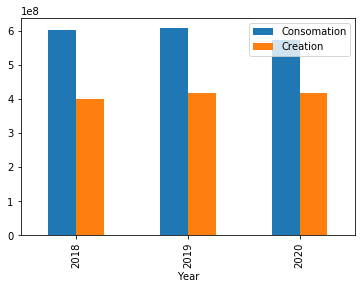

In [7]:
DataF.plot(x="Year",y=["Consomation", "Creation"], kind="bar");

## Trying the Pivot

In [8]:
df1t["ÁMBITO 1"].value_counts()

Parque Tecnológico de Valdemingómez    24
Edificios y Centros                    18
Parque móvil                           12
Parques y viveros                      12
Alumbrado e instalaciones               3
Name: ÁMBITO 1, dtype: int64

## Pire consomateur de l'année

In [9]:
ParqueTec = df1t.loc[(df1t['AÑO'] == 2018) & (df1t["ÁMBITO 1"] == "Parque Tecnológico de Valdemingómez") & (df1t["CLASE"] == "Consumida"), 'CANTIDAD'].sum()
PEdif = df1t.loc[(df1t['AÑO'] == 2018) & (df1t["ÁMBITO 1"] == "Edificios y Centros") & (df1t["CLASE"] == "Consumida"), 'CANTIDAD'].sum()
ParqueMov = df1t.loc[(df1t['AÑO'] == 2018) & (df1t["ÁMBITO 1"] == "Parque móvil") & (df1t["CLASE"] == "Consumida"), 'CANTIDAD'].sum()
ParqueVive = df1t.loc[(df1t['AÑO'] == 2018) & (df1t["ÁMBITO 1"] == "Parques y viveros") & (df1t["CLASE"] == "Consumida"), 'CANTIDAD'].sum()
Alum = df1t.loc[(df1t['AÑO'] == 2018) & (df1t["ÁMBITO 1"] == "Alumbrado e instalaciones") & (df1t["CLASE"] == "Consumida"), 'CANTIDAD'].sum()





In [38]:
v = {'Ambito': ["Parque Tecnológico de Valdemingómez", "Edificios y Centros", "Parque móvil", "Parques y viveros", "Alumbrado e instalaciones"], 'Creation': [ParqueTec, PEdif, ParqueMov, ParqueVive, Alum]}
Conso2018Separado = pd.DataFrame(data=v)
Conso2018Separado

,Ambito,Creation
0,Parque Tecnológico de Valdemingómez,1.357984e+08
1,Edificios y Centros,3.059853e+08
2,Parque móvil,2.056965e+07
3,Parques y viveros,4.046087e+06
4,Alumbrado e instalaciones,1.344426e+08


In [41]:


res = df1t.groupby(['ÁMBITO 2', 'AÑO', 'CLASE','TIPO'])['CANTIDAD'].mean().reset_index()



In [40]:
res = res[(res['CLASE'] == 'Generada') & (res['AÑO'] == 2018)]
res

,ÁMBITO 2,AÑO,CLASE,TIPO,CANTIDAD
0,Biogás de vertedero,2018,Generada,Electricidad,40380245.0
3,Biometano,2018,Generada,Gas,95617496.0
21,Incineración residuos,2018,Generada,Electricidad,222921800.0
24,Instalaciones fotovoltaicas,2018,Generada,Electricidad,47516.0


In [47]:
group=df1t.groupby(["TIPO","CLASE"])['CANTIDAD']
test = group.size().reset_index(name='counts')
test

,TIPO,CLASE,counts
0,Electricidad,Consumida,21
1,Electricidad,Generada,15
2,GLP,Consumida,3
3,Gas,Generada,3
4,Gas Natural,Consumida,12
5,Gasolina,Consumida,3
6,Gasóleo,Consumida,9
7,Propano,Consumida,3
